In [ ]:

#Description:  A sentiment Analysis program  that parses the tweets fetched from Twitter using Python

In [ ]:
# import the libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [ ]:
# load the data

from google.colab import files
uploaded = files.upload()

Saving twitterLogin - Sheet1.csv to twitterLogin - Sheet1.csv


In [ ]:
twitterLogin = pd.read_csv('twitter.csv')

In [ ]:
consumerKey = twitterLogin['key'][0]
consumerSecret = twitterLogin['key'][1]
accessToken = twitterLogin['key'][2]
accessTokenSeceret = twitterLogin['key'][3]

In [ ]:
#Create the authentication object

authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set access token and access token secret

authenticate.set_access_token(accessToken, accessTokenSeceret)

#Create the API object while passing the auth information
api = tweepy.API(authenticate, wait_on_rate_limit= True) 

In [ ]:
# Extract 100 tweets from twitter user

posts = api.user_timeline(screen_name = "BillGates", count = 100, lang= "en", tweet_mode="extended")

#Print the last 5 tweets from the account
print("show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' +tweet.full_text + '\n')
  i = i+1

show the 5 recent tweets: 

1)This new quiz from @Gapminder is a clever way to fight misconceptions and “upgrade your worldview” about the incredible progress the world has made toward the Sustainable Development Goals to end poverty, fight inequality, and stop climate change: https://t.co/Qo0oaxv1tb

2)Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social media plays in spreading misinformation, and the one lie I choose to believe even though I know it’s not always true: https://t.co/7pzUFsMf5D https://t.co/YEjZaXLTbJ

3)I believe we can avoid a climate disaster—if we deploy the clean-energy tools we have now wisely, and if we make big breakthroughs that touch every aspect of our physical economy. Creating the National Institutes of Energy Innovation would put us on the right path.

4)To reduce duplication, focus the government’s efforts, and get the most innovation out of every dollar of funding, we should create a new organization: the Nati

In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#show the first 5 rows of data
df.head()

,Tweets
0,This new quiz from @Gapminder is a clever way ...
1,Rashida Jones and I talked to Yuval Noah Harar...
2,I believe we can avoid a climate disaster—if w...
3,"To reduce duplication, focus the government’s ..."
4,We need to revolutionize the world’s physical ...


In [ ]:
# Data Cleaning

#Create a function to clean tweets

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)  # r tells expression is raw string
  text = re.sub(r'#', '', text) #remove # symbol
  text = re.sub(r'RT[\s]+','', text) #Removing retweet
  text = re.sub(r'https?:\/\/\S+','', text) #remove the hyperlink

  return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt) # ? check apply functions

#Show the cleaned text
df

,Tweets
0,This new quiz from is a clever way to fight m...
1,Rashida Jones and I talked to Yuval Noah Harar...
2,I believe we can avoid a climate disaster—if w...
3,"To reduce duplication, focus the government’s ..."
4,We need to revolutionize the world’s physical ...
...,...
95,: Here's what Juneteenth means to me:
96,: “It’s that clarity of language about the VAL...
97,": ""And I’ll never lose my faith that you and I..."
98,": When I think of emancipation, I think of all..."


In [ ]:
#Create a function to get subjectivity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Function to tell us polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,This new quiz from is a clever way to fight m...,0.729293,0.401010
1,Rashida Jones and I talked to Yuval Noah Harar...,0.358333,0.191667
2,I believe we can avoid a climate disaster—if w...,0.419643,0.246429
3,"To reduce duplication, focus the government’s ...",0.477273,0.318182
4,We need to revolutionize the world’s physical ...,0.372619,-0.186111
...,...,...,...
95,: Here's what Juneteenth means to me:,0.000000,0.000000
96,: “It’s that clarity of language about the VAL...,0.433333,-0.166667
97,": ""And I’ll never lose my faith that you and I...",0.000000,0.000000
98,": When I think of emancipation, I think of all...",0.000000,0.000000


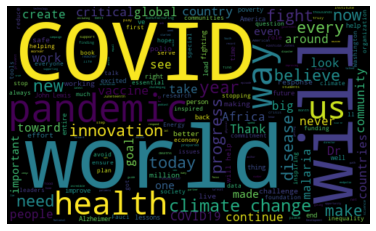

In [ ]:
#Plot the Word Cloud

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,This new quiz from is a clever way to fight m...,0.729293,0.401010,Positive
1,Rashida Jones and I talked to Yuval Noah Harar...,0.358333,0.191667,Positive
2,I believe we can avoid a climate disaster—if w...,0.419643,0.246429,Positive
3,"To reduce duplication, focus the government’s ...",0.477273,0.318182,Positive
4,We need to revolutionize the world’s physical ...,0.372619,-0.186111,Negative
...,...,...,...,...
95,: Here's what Juneteenth means to me:,0.000000,0.000000,Neutral
96,: “It’s that clarity of language about the VAL...,0.433333,-0.166667,Negative
97,": ""And I’ll never lose my faith that you and I...",0.000000,0.000000,Neutral
98,": When I think of emancipation, I think of all...",0.000000,0.000000,Neutral


In [ ]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j + 1

1)This new quiz from  is a clever way to fight misconceptions and “upgrade your worldview” about the incredible progress the world has made toward the Sustainable Development Goals to end poverty, fight inequality, and stop climate change: 

2)Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social media plays in spreading misinformation, and the one lie I choose to believe even though I know it’s not always true:  

3)I believe we can avoid a climate disaster—if we deploy the clean-energy tools we have now wisely, and if we make big breakthroughs that touch every aspect of our physical economy. Creating the National Institutes of Energy Innovation would put us on the right path.

4)To reduce duplication, focus the government’s efforts, and get the most innovation out of every dollar of funding, we should create a new organization: the National Institutes of Energy Innovation.

5)This the most important thing the U.S. can do to lead the world in

In [ ]:
#Print the negative tweets

j=1
sortedDF= df.sort_values(by=['Polarity'], ascending= False)
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

2) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s Disease Data Initiative () will speed up progress. 

3) : Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

4) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

5) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

6) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be di

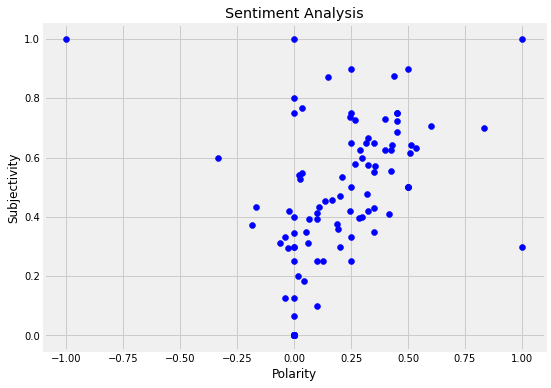

In [ ]:
# Plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get percentage of positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0])*100, 1)

69.0

In [ ]:
# Get percentage of positive tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0])*100, 1)

9.0

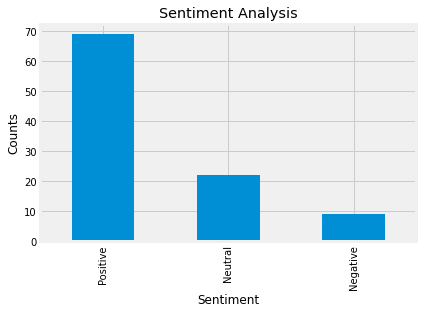

In [ ]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()